<a href="https://colab.research.google.com/github/heyitzrizki/final-project-ds49-group3/blob/main/eda%20%26%20preprocessing/eda_%26_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Connect to GitHub

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 0.2 Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/heyitzrizki/final-project-ds49-group3/refs/heads/main/data/dataset.csv'
df = pd.read_csv(url)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [6]:
df.shape

(197428, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

# 1. Exploratory Data Analysis

## 1.1 Check Null Values

In [3]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [7]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


## 1.2 Check Duplicate Data

In [9]:
df_copy = df.copy()

In [10]:
df.duplicated().sum()

np.int64(0)

## 1.3 Check Unique Values

### 1.3.1 Check Data Shape

In [12]:
df.shape

(197428, 14)

### 1.3.2 Check Data Type

In [13]:
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


### 1.3.3 Check Data Stats

In [14]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [16]:
df_copy = df_copy.select_dtypes(exclude=["object"])
df_copy.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [17]:
na_cols = df_copy.columns[df_copy.isna().any()].tolist()
for col in na_cols:
    if df_copy[col].dtype != 'object':
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean()).round(0)

print(df_copy.isna().sum())

market_id                   0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


## 1.4 Outlier Detection

## 1.5 Correlation Heatmap

In [18]:
pd.options.display.float_format = "{:,.2f}".format

In [21]:
corr_matrix = df_copy.corr()
corr_matrix

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
market_id,1.00,-0.02,-0.01,-0.02,0.00,-0.00,-0.00,0.06,0.05,0.05
order_protocol,-0.02,1.00,0.01,-0.05,-0.02,-0.05,-0.09,0.14,0.14,0.13
total_items,-0.01,0.01,1.00,0.56,0.76,-0.39,-0.06,0.03,0.03,0.03
subtotal,-0.02,-0.05,0.56,1.00,0.68,0.04,0.51,0.13,0.12,0.13
num_distinct_items,0.00,-0.02,0.76,0.68,1.00,-0.45,0.04,0.06,0.06,0.06
min_item_price,-0.00,-0.05,-0.39,0.04,-0.45,1.00,0.55,0.04,0.04,0.04
max_item_price,-0.00,-0.09,-0.06,0.51,0.04,0.55,1.00,0.13,0.13,0.13
total_onshift_partners,0.06,0.14,0.03,0.13,0.06,0.04,0.13,1.00,0.94,0.94
total_busy_partners,0.05,0.14,0.03,0.12,0.06,0.04,0.13,0.94,1.00,0.93
total_outstanding_orders,0.05,0.13,0.03,0.13,0.06,0.04,0.13,0.94,0.93,1.00


In [22]:
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
market_id,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
order_protocol,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
total_items,0.00,0.00,1.00,0.56,0.76,-0.39,0.00,0.00,0.00,0.00
subtotal,0.00,0.00,0.56,1.00,0.68,0.00,0.51,0.00,0.00,0.00
num_distinct_items,0.00,0.00,0.76,0.68,1.00,-0.45,0.00,0.00,0.00,0.00
min_item_price,0.00,0.00,-0.39,0.00,-0.45,1.00,0.55,0.00,0.00,0.00
max_item_price,0.00,0.00,0.00,0.51,0.00,0.55,1.00,0.00,0.00,0.00
total_onshift_partners,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.94,0.94
total_busy_partners,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,1.00,0.93
total_outstanding_orders,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.93,1.00


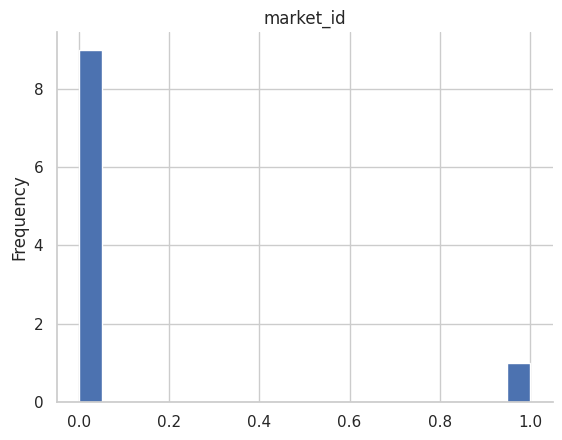

In [24]:
# @title market_id

from matplotlib import pyplot as plt
corr_matrix['market_id'].plot(kind='hist', bins=20, title='market_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

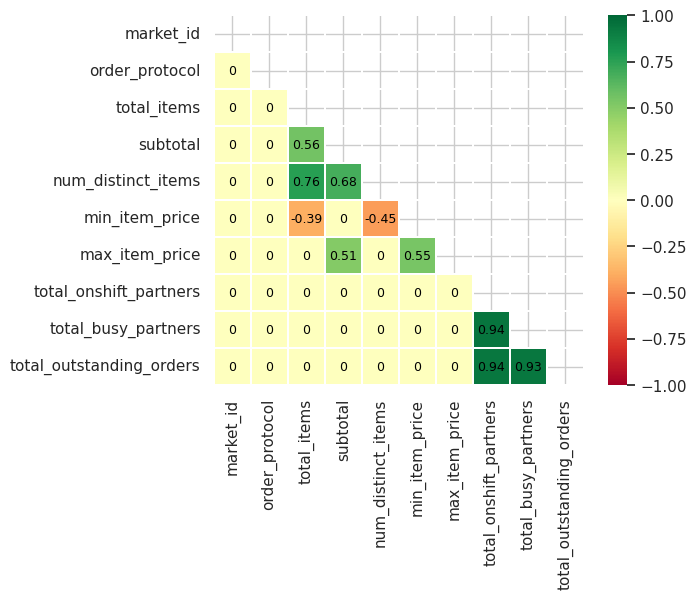

In [26]:
cmap = "RdYlGn"

# Plot the heatmap
sns.heatmap(
    data=corr_matrix,
    mask=mask, # cover, not showing them which masked True
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot_kws={
        "size": 9,
        "color": "black"
    },
    square=True,
    cmap=cmap,
    annot=True
);

## 1.6 Visualisasi Target Delivery Time

# 2. Data Preprocessing

## 2.1 Feature Engineering: Hitung `delivery_duration_minutes`

## 2.2 Drop kolom tidak relevan

## 2.3 Handle Missing Values

## 2.4 Encoding (jika perlu)

## 2.5 Feature Scaling

## 2.6 Save cleaned data untuk modeling